# Estadística básica para Machine Learning 📈

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/statistical_distributions.png?raw=true" alt="Drawing" style="width:1000px;">

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Machine_Learning_Course


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Poblaciones
En el contexto estadístico, respondemos preguntas sobre poblaciones en lugar de sobre individuos.

Preguntas sobre **individuos**:

* ¿Cuál es la distancia que alcanza una bala de cañón disparada con un cierto ángulo, fuerza, resistencia al viento, etc.?
* ¿En qué momento fallará esta máquina?

Preguntas sobre **poblaciones**:

* ¿Cuál es la probabilidad de observar un trilobite (artrópodos extintos) de más de 3 cm de longitud?
* Si veo un trilobite de 3 cm de longitud, ¿es más probable que pertenezca a la especie africana o a la americana?
* Si aplico cierto proceso a todos mis productos, ¿cuál es la probabilidad de obtener uno defectuoso?

A veces no es posible razonar sobre individuos. Quizás no tenemos un modelo preciso sobre su comportamiento, el mundo es intrínsecamente aleatorio, etc.

 ---
En estadística, el enfoque en las poblaciones nos permite hacer inferencias y predicciones basadas en datos recopilados. Esto es esencial en machine learning, donde a menudo trabajamos con grandes conjuntos de datos para entrenar modelos que generalicen bien.

---

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/population.png?raw=true" alt="Drawing" style="width:200px;">

## Distribuciones

La distribución proporciona una función matemática parametrizada que puede usarse para **calcular la probabilidad a partir de una población observable**. Una distribución es una descripción general de cierta característica de una población (por ejemplo, la longitud de los trilobites).

* A veces se nos da la distribución exacta que sigue una población.
* A veces se nos proporciona una muestra de una población y eso es todo lo que tenemos para responder preguntas.

**Variables Aleatorias**: Son funciones que asignan valores (medidas) a un fenómeno aleatorio, es decir, los posibles valores son resultados de un fenómeno aleatorio. Variables que varían debido al azar.

Ciertos procesos generan poblaciones con distribuciones bien conocidas:

**Distribución uniforme**: cada valor dentro de un cierto rango es igualmente probable.

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/distribucion_uniforme.png?raw=true" alt="Drawing" style="width:300px;">

**Distribución normal(gaussiana)**: distribución simétrica en forma de campana que aparece comúnmente en la naturaleza.

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/distribucion_normal.png?raw=true" alt="Drawing" style="width:300px;">

**Distribución de Poisson**: probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo.

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/distribucion_poisson.png?raw=true" alt="Drawing" style="width:300px;">

**Distribución de Bernoulli**: describe experimentos con dos posibles resultados: éxito o fracaso.

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/distribucion_bernoulli.png?raw=true" alt="Drawing" style="width:300px;">

### Ejemplos de distribución con trilobitas



<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/trilobites.png?raw=true" alt="Drawing" style="width:500px;">

Se nos proporciona la siguiente muestra de 10,000 trilobites americanos que han sido capturados en la naturaleza, y se han medido su ancho y longitud.

In [ ]:
tr1 = pd.read_csv("data/trilobites1.csv.gz")
print(tr1.shape)
tr1.tail(10)

(10000, 2)


,length,width
0,2.673751,1.078531
1,3.570652,1.080107
2,2.594188,1.372952
3,3.129163,1.367189
4,3.370358,1.482623
5,4.179161,1.212016
6,2.548383,1.262506
7,3.472026,1.320668
8,3.220176,1.217785
9,3.287574,1.474200


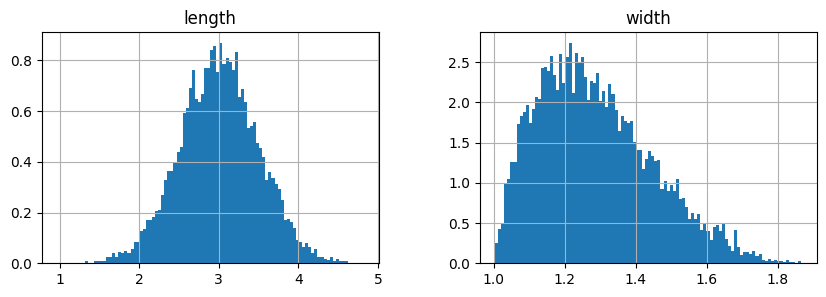

In [ ]:
tr1.hist(bins=100,  density=True, figsize=(10,3));

* ¿Estas distribuciones te resultan familiares?

* ¿Cuál es la probabilidad de encontrar un trilobite con longitud > 4?

$\rightarrow$ Observa el poder de la notación matricial, intenta entender qué tipo de objeto se genera en cada parte de las siguientes expresiones

In [ ]:
print("%.3f"%np.mean(tr1.length), "%.3f"%np.std(tr1.length))
print("%.3f"%np.mean(tr1.width), "%.3f"%np.std(tr1.width))
print("%.3f"%np.mean(tr1.length>3))

3.008 0.495
1.286 0.160
0.506


#### Función de densidad de probabilidad

La Función de Densidad de Probabilidad es una herramienta fundamental en estadística para trabajar con variables aleatorias continuas. Nos permite determinar la probabilidad de que una variable aleatoria tome un valor dentro de un rango específico.

Específicamente, la PDF es una función que describe cómo se distribuye la densidad de probabilidad a lo largo de los valores de $X$:

$$f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

In [ ]:
#PDF = Probability density function
import scipy.stats as stats
density_at_4 = stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length)).pdf(4.5)
print("%.3f" % density_at_4)

0.009


#### Función de distribución acumulada

La Función de Distribución Acumulada (CDF) es esencial en estadística para entender cómo se distribuyen las probabilidades en una variable aleatoria, ya sea discreta o continua.

Específicamente, la **CDF** es una función que describe la probabilidad de que la variable aleatoria \( X \) tome un valor menor o igual a \( x \), dada por:

$$F_X(x) = P(X \leq x)$$

Definida como:

$$F(x) = \sum_{x_i \leq x} f(x_i)$$

La probabilidad de que \( X \) esté en el intervalo semiabierto \( (a, b] \), donde \( a < b \), es entonces:

$$P(a < X \leq b) = F_X(b) - F_X(a)$$

In [ ]:
#CDF= cumulative distribution function
import scipy.stats as stats
print("%.3f"%(stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length)).cdf(3)))

0.494


* ¿Qué significa la siguiente notación?

In [ ]:
print(tr1[tr1.length<3].width.values)
print(tr1[tr1.length<3].length.values)

[1.0785313  1.37295223 1.26250643 ... 1.24785625 1.2638682  1.48164417]
[2.67375116 2.5941877  2.54838301 ... 2.74109443 2.74992804 2.90588363]


* ¿Están correlacionadas la longitud y la anchura?

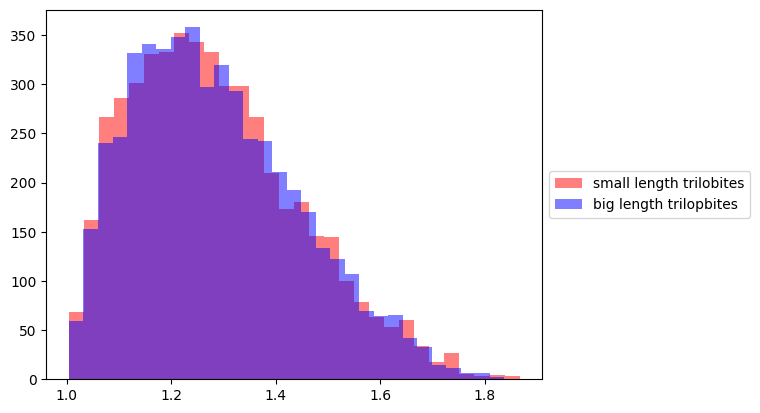

In [ ]:
plt.hist(tr1[tr1.length<3].width.values, bins=30, color="red",  alpha=.5,label="small length trilobites");
plt.hist(tr1[tr1.length>=3].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [ ]:
np.corrcoef(tr1.length, tr1.width)

array([[ 1.        , -0.00304669],
       [-0.00304669,  1.        ]])

Ahora nos dan una muestra de 10.000 **trilobites africanos**

(10000, 2)


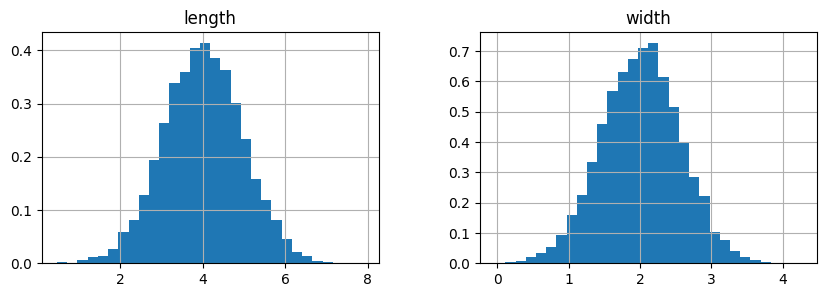

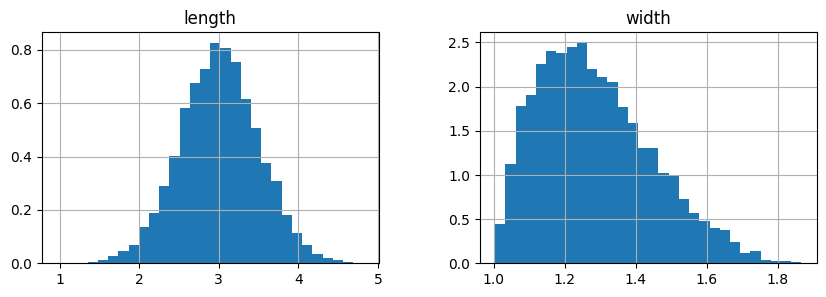

In [ ]:
tr2 = pd.read_csv("data/trilobites2.csv.gz")
print(tr2.shape)
tr2.hist(bins=30, figsize=(10,3), density=True);
tr1.hist(bins=30, figsize=(10,3), density=True);

In [ ]:
print("%.3f"%np.mean(tr2.length), "%.3f"%np.std(tr2.length))
print("%.3f"%np.mean(tr1.length), "%.3f"%np.std(tr1.length))
print("%.3f"%np.mean(tr2.width), "%.3f"%np.std(tr2.width))
print("%.3f"%np.mean(tr2.length>4))

4.006 0.960
3.008 0.495
2.013 0.553
0.504


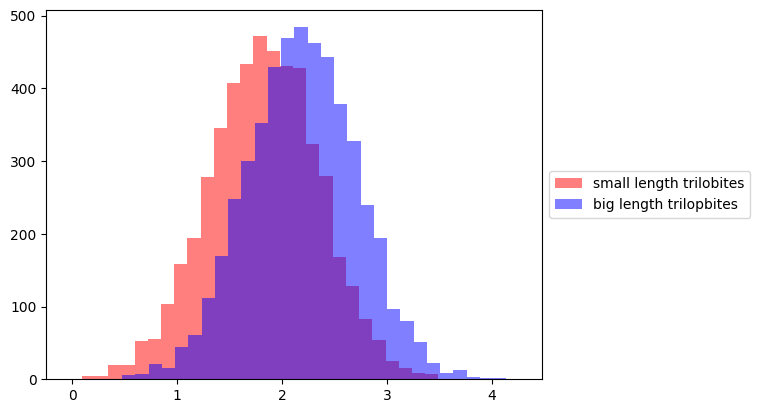

In [ ]:
plt.hist(tr2[tr2.length<4].width.values, bins=30, color="red", alpha=.5, label="small length trilobites");
plt.hist(tr2[tr2.length>=4].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [ ]:
np.corrcoef(tr2.length, tr2.width)

array([[1.        , 0.41599215],
       [0.41599215, 1.        ]])

Comparemos las poblaciones "african trilobites" y "american trilobites". Los histogramas observados están _normalizados_.

Text(0.5, 1.0, 'width')

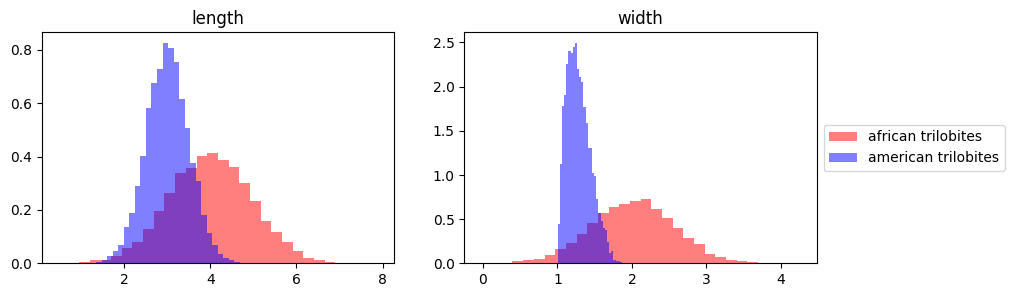

In [ ]:
##This script visualizes the distribution of length and width measurements of trilobites
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(tr2.length.values, bins=30, density=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.length.values, bins=30, density=True, color="blue", alpha=.5, label="american trilobites");
plt.title("length")
plt.subplot(122)
plt.hist(tr2.width.values, bins=30, density=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.width.values, bins=30, density=True, color="blue", alpha=.5, label="american trilobites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))
plt.title("width")

Text(0, 0.5, 'width')

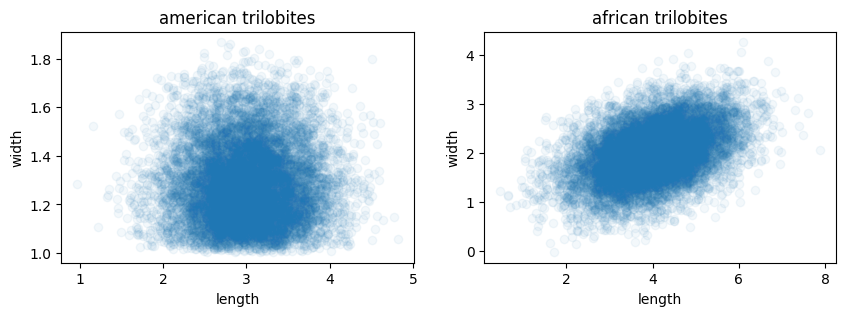

In [ ]:
##This script generates a comparative visualization of trilobite size dimensions (length and width)
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.scatter(tr1.length, tr1.width, alpha=.05)
plt.title("american trilobites")
plt.xlabel("length")
plt.ylabel("width")
plt.subplot(122)
plt.scatter(tr2.length, tr2.width, alpha=.05)
plt.title("african trilobites")
plt.xlabel("length")
plt.ylabel("width")

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/03_Estadistica/Correlation_examples.png?raw=true" style="width:700px;">

#### Distribuciones en Python

Ahora, vamos a estudiar algunas distribuciones usando Python:

- a través de `numpy` (principalmente para muestreo, muy rápido)
- a través de `scipy.stats` (pdf, cdf, intervalos, etc.)

Usando `random numpy`:



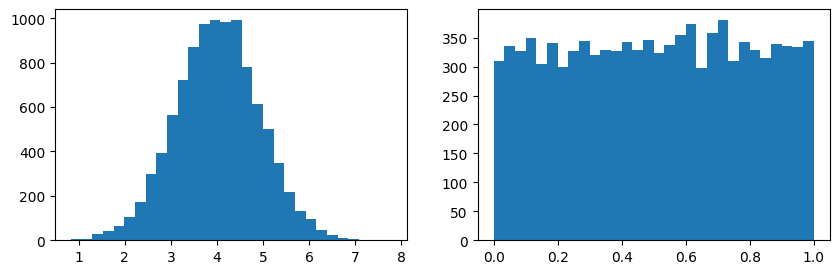

In [ ]:
plt.figure(figsize=(310,))
plt.subplot(121)
sample = np.random.normal(loc=4, scale=.9, size=10000)
plt.hist(sample, bins=30);
plt.subplot(122)
sample = np.random.random(size=10000)
plt.hist(sample, bins=30);

Usando `stat scipy`:

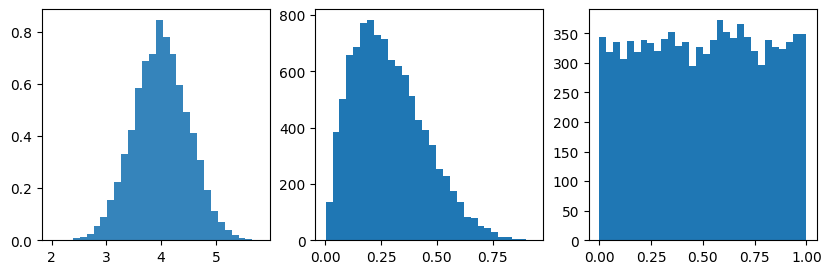

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(131)
d1 = stats.norm(loc=4, scale=.5)
samples = d1.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.9);
plt.subplot(132)
d2 = stats.beta(a=2, b=5)
samples = d2.rvs(10000)
plt.hist(samples, bins=30);
plt.subplot(133)
d2 = stats.uniform()
samples = d2.rvs(10000)
plt.hist(samples, bins=30);

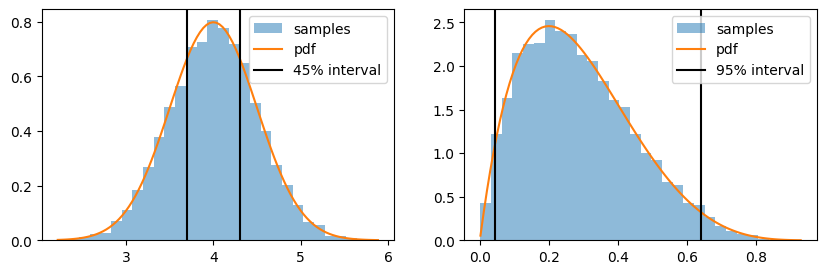

In [ ]:
##This code visualize the normal (Gaussian) distribution and the beta distribution
plt.figure(figsize=(10,3))
plt.subplot(121)
d1 = stats.norm(loc=4, scale=.5)
samples = d1.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d1.pdf(t), label="pdf")
#Confidence interval with equal areas around the median.
interval = d1.interval(.45)
#Add a vertical line across the axes.
plt.axvline(interval[0], color="black", label="45% interval")
plt.axvline(interval[1], color="black")
plt.legend()

plt.subplot(122)
d2 = stats.beta(a=2, b=5)
samples = d2.rvs(10000)
plt.hist(samples, bins=30, density=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d2.pdf(t), label="pdf")
interval = d2.interval(.95)
plt.axvline(interval[0], color="black", label="95% interval")
plt.axvline(interval[1], color="black")
plt.legend()

In [ ]:
%timeit np.random.normal(10000)

1.29 µs ± 359 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%timeit d1.rvs(10000)

545 µs ± 77.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Aplicaciones de Clasificación

Supongamos que hemos encontrado un conjunto de nuevos trilobites con diferentes longitudes. Por ejemplo, longitudes de 2, 3 y 4.

**¿A qué clase (africana o americana) crees que pertenecen? ¿Con qué probabilidad?**

In [ ]:
gaussian1 = stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length))
gaussian2 = stats.norm(loc=np.mean(tr2.length), scale=np.std(tr2.length))
print("%.3f"%gaussian1.pdf(2))
print("%.3f"%gaussian2.pdf(2))
print( "--")
print( "%.3f"%gaussian1.pdf(3))
print( "%.3f"%gaussian2.pdf(3))
print( "--")
print( "%.3f"%gaussian1.pdf(4))
print( "%.3f"%gaussian2.pdf(4))

0.101
0.047
--
0.806
0.240
--
0.108
0.416


# Ley de los Grandes Números

La **Ley de los Grandes Números (LLN)** es un teorema que describe el resultado de realizar el mismo experimento un gran número de veces, con experimentos generados aleatoriamente y distribuidos de manera idéntica. Según la LLN, a medida que aumenta el número de ensayos o muestras, el promedio de los resultados obtenidos de estos ensayos convergerá al valor esperado (o media) de la población.

$$\bar{X}_n \rightarrow \mu \quad \text{cuando} \quad n \rightarrow \infty$$

1. Toma una muestra de tamaño 2, 3, 4, ..., hasta 1000 de cualquier distribución.
2. Calcula la **media muestral** para cada tamaño de muestra.
3. Grafica las **medias muestrales** y compáralas con la media real de la población.
4. Repite 2 veces.

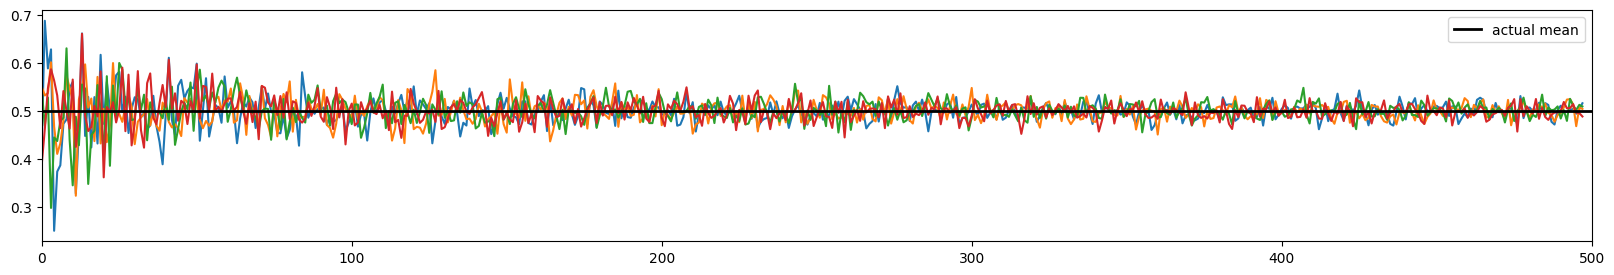

In [ ]:
#aims to illustrate the Law of Large Numbers (LLN)
plt.figure(figsize=(20,3))
for i in range(1, 5):
    sample_means= [np.mean(np.random.uniform(size=N)) for N in range(2,500)]
    plt.plot(sample_means)#, label="run %d"%i)

plt.axhline(0.5, label="actual mean", color="black", lw=2)
plt.xlim(0,500)
plt.legend()

# Teorema del Límite Central

La distribución de probabilidad de la media de variables aleatorias independientes e idénticamente distribuidas (i.i.d.) con varianza finita se acerca a una **distribución normal** a medida que aumenta el tamaño de la muestra.

Un resumen para demostrar el teorema del límite central es:

1. Toma una muestra de tamaño N=2 de cualquier distribución.
2. Calcula la **media muestral**.
3. Repite 100 veces.

4. Grafica la distribución de la **media muestral**.
5. Repite para N=4, 10, 30.

**Las agregaciones de variables aleatorias i.i.d. están distribuidas como una Gaussiana**:

$$\frac{X_1 + X_2 + \dots + X_N}{N} \sim \mathcal{N} \left( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right)$$

**i.i.d.** significa que cada variable aleatoria tiene la misma distribución y todas son mutuamente independientes.

El teorema del límite central nos permite usar estadísticas de muestras sin conocer la forma particular de la distribución de la población.

0 2
1 3
2 10
3 20


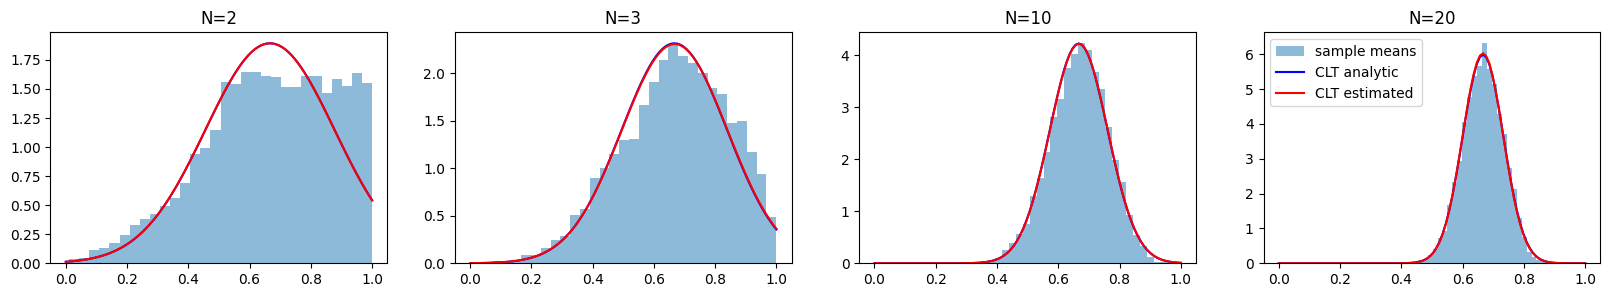

In [ ]:
#practical illustration of the Central Limit Theorem (CLT) using a Beta distribution as the parent distribution
plt.figure(figsize=(20,3))

a,b = 1.,.5
distrib = stats.beta(a=a,b=b)
d_mean = a/(a+b)
d_std  = np.sqrt(a*b/((a+b+1)*(a+b)**2))


for i,N in enumerate([2,3,10,20]):
    print(i, N)
    sample_means = []
    # _ is a traditional name for "don't care"
    for _ in range(10000):
        sample_of_size_N = distrib.rvs(N)
        sample_means.append(np.mean(sample_of_size_N))
    plt.subplot(1,4,i+1)
    x = np.linspace(0,1,100)
    plt.hist(sample_means, bins=30, density=True, alpha=.5, label="sample means");
    ref = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
    plt.plot(x, ref.pdf(x), label="CLT analytic", color="blue")
    ref = stats.norm(loc=np.mean(sample_means), scale=np.std(sample_means))
    plt.plot(x, ref.pdf(x), label="CLT estimated", color="red")
    plt.title("N=%d"%N)
plt.legend()

# Pruebas de Hipótesis

Es un procedimiento para establecer si una propiedad de una población estadística es compatible con lo observado en una muestra de la población, es decir, es un análisis de datos confirmatorio.

En promedio, las calificaciones de los estudiantes en un curso son 3.9 y su desviación estándar es 0.76. Este semestre, mi clase de 20 estudiantes tuvo un promedio de 3.5:

- ¿Ha ocurrido algo malo este semestre?
- ¿Es solo una fluctuación estadística?

**Reformulemos la pregunta**: Si no ocurrió nada anormal, ¿qué tan probable es obtener una muestra de 20 estudiantes con un promedio de 3.5?

Si es muy improbable (digamos, probabilidad <5%), entonces tenemos evidencia para pensar que esto **NO** es una fluctuación aleatoria.

**Empíricamente:** Respondamos por fuerza bruta.

1. Supongamos que las calificaciones siguen alguna distribución con media 3.9.
2. Toma una muestra de tamaño 20 y calcula la **media muestral**.
3. Repite el paso 2 unas 10,000 veces.
4. Grafica el histograma de las **medias muestrales**.
5. ¿Está 3.5 dentro del intervalo de confianza del 95%?

**Analíticamente:** También podemos responder con el Teorema del Límite Central.

1. Construye una distribución Gaussiana con la media y desviación estándar descritas arriba.
2. Calcula los intervalos de confianza del 95%.

3.790060947819144
P-value
empirical  prob <3.5 = 0.001
analytical prob <3.5 = 0.000


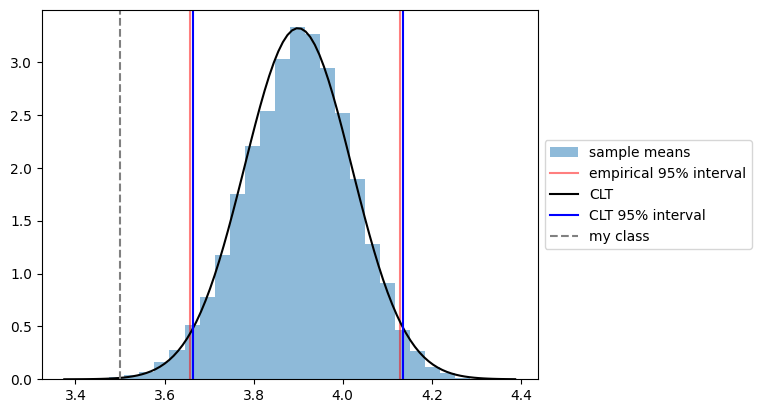

In [ ]:
def ht(N):
    # first by brute force
    d = stats.beta(5, 1.41)
    print(np.mean(d.rvs(size=N)*5))
    sample_means = np.r_[[np.mean(d.rvs(size=N)*5) for _ in range(10000)]]
    print ("P-value")
    print ("=======")
    print ("empirical  prob <3.5 = %.3f"%np.mean(sample_means<3.5))
    plt.hist(sample_means, bins=30, alpha=.5, density=True, label="sample means");
    empirical_interval = np.percentile(sample_means, [2.5, 97.5])
    plt.axvline(empirical_interval[0], color="red",  alpha=.5)
    plt.axvline(empirical_interval[1], color="red",  alpha=.5, label="empirical 95% interval")

    # now analytical
    t = np.linspace(np.min(sample_means), np.max(sample_means), 100)
    ref = stats.norm(loc=3.9, scale=0.76/np.sqrt(N))
    plt.plot(t, ref.pdf(t), label="CLT", color="black")

    interval = ref.interval(.95)
    plt.axvline(interval[0], color="blue", label="CLT 95% interval")
    plt.axvline(interval[1], color="blue")

    plt.axvline(3.5, color="gray", ls="--", label="my class")
    plt.legend(loc="center left", bbox_to_anchor=(1,.5))

    print("analytical prob <3.5 = %.3f"%ref.cdf(3.5))

ht(40)

3.9940180764308364
P-value
empirical  prob <3.5 = 0.125
analytical prob <3.5 = 0.120


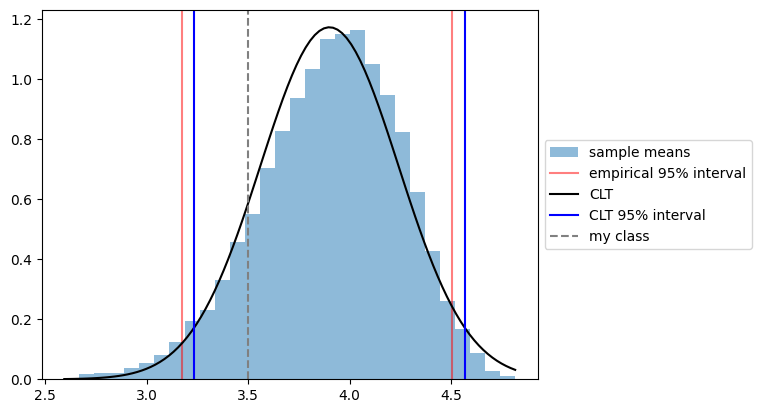

In [ ]:
ht(5)

Observa lo que sucede si nuestra clase fuera más pequeña o más grande.

- **Muestras más pequeñas:** El intervalo de confianza crece, la distribución aún no converge a normal (el **Teorema del Límite Central** necesita muestras más grandes).
- **Muestras más grandes:** El intervalo de confianza se reduce y el TLC funciona bien.

## References

[1] statistic in plain english (book)

[2] Reference scipy: https://docs.scipy.org/doc/scipy/reference/index.html

[3] Some distributions in scipy: http://cmdlinetips.com/2018/03/probability-distributions-in-python/

[4] Statistical distributions: a summary: http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm

<img src="https://github.com/ProgramandoSinBarreras/MachineLearningCourse/blob/main/Imagenes/01_introduccion_python/programando_sin_barreras.jpeg?raw=true" alt="Drawing" style="width:1000px;">